In [1]:
# settings 
# img_size is dimension to resize images to.
img_size = (175,175)
# number of pics in each class to use. use None for all
#pics_per_class = 300
pics_per_class = None
# set zipped datafile location​img_size
data_file = 'C:/Users/Nick/kaggle/plant-seedlings/maxrgb.zip'
alpha_file = 'C:/Users/Nick/kaggle/plant-seedlings/alpha.zip'
from ds_functions import *


In [2]:
data = images_to_df(data_file, 
                    img_size=img_size, 
                    pics_per_class=pics_per_class)

# Set features and target
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 
features += ['color_sum'+str(i) for i in range(1,4)]
features += ['color_mean'+str(i) for i in range(1,4)]

target = 'class'


In [3]:
# try plotting the data. See what color is the most common
colrange = {}
for i in range(1,4):
    colrange[i] = ['px' + str(j) for j in range(1 + (i-1), img_size[0] * img_size[1], 3)]
    
color_sums = pd.DataFrame({
    'id': data.loc[:, 'id']
})

for i in range(1,4):
    color_sums['color_sum' + str(i)] = data.loc[:, colrange[i]].sum(axis=1).reset_index(drop=True)
    # also add the average
    color_sums['color_mean' + str(i)] = data.loc[:, colrange[i]].mean(axis=1).reset_index(drop=True)
    
# I'll try joining the total color data to the pixel data and include the sum of each color as a feature
if not 'color_sum1' in list(data.columns):
    data = data.merge(color_sums, on='id')

data.head()

,class,id,px1,px2,px3,px4,px5,px6,px7,px8,...,px91872,px91873,px91874,px91875,color_sum1,color_mean1,color_sum2,color_mean2,color_sum3,color_mean3
0,Black-grass,0050f38b3,66,66,66,62,62,62,68,68,...,64,58,58,58,643313,63.020474,643313,63.020474,643313,63.020474
1,Black-grass,0183fdf68,55,55,55,56,56,56,59,59,...,73,72,72,72,674719,66.097081,709273,69.482073,676396,66.261364
2,Black-grass,0260cffa8,52,52,52,52,52,52,52,52,...,80,80,80,80,686974,67.297610,782141,76.620396,681730,66.783895
3,Black-grass,05eedce4d,78,78,78,80,80,80,81,81,...,73,74,74,74,657742,64.433973,690990,67.691027,660599,64.713852
4,Black-grass,075d004bc,104,104,104,103,103,103,0,166,...,57,57,57,57,721729,70.702292,758893,74.342966,688910,67.487265


In [10]:
max_features = int(np.round(np.sqrt(len(features)))) / 2
rf = RandomForestClassifier(n_estimators=800, n_jobs=4, max_features=max_features)

rf_model = sk_cls(rf, data, X=features, y=target)
rf_model.run()

Score:
 0.6105263157894737
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.50      0.11      0.17        19
                 Charlock       0.74      0.76      0.75        49
                 Cleavers       0.65      0.58      0.61        26
         Common Chickweed       0.56      0.71      0.62        68
             Common wheat       1.00      0.19      0.32        21
                  Fat Hen       0.48      0.52      0.50        44
         Loose Silky-bent       0.56      0.82      0.66        66
                    Maize       1.00      0.16      0.28        25
        Scentless Mayweed       0.52      0.72      0.60        47
          Shepherds Purse       0.60      0.14      0.22        22
Small-flowered Cranesbill       0.75      0.86      0.80        51
               Sugar beet       0.76      0.59      0.67        37

              avg / total       0.65      0.61      0.58       475



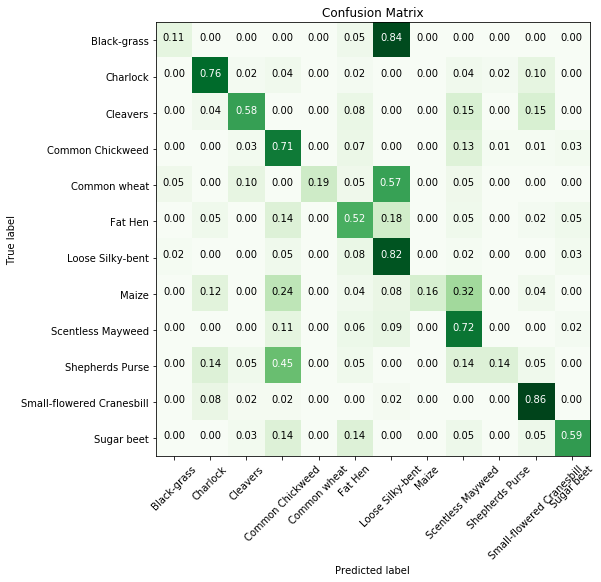

In [11]:
rf_model.show()


In [ ]:
data_alpha = images_to_df(alpha_file, 
                    img_size=img_size, 
                    pics_per_class=pics_per_class)

# Set features and target
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 
features += ['color_sum'+str(i) for i in range(1,4)]
features += ['color_mean'+str(i) for i in range(1,4)]

target = 'class'

In [ ]:
rf_alpha = sk_cls(RandomForestClassifier(n_estimators=600, n_jobs=4,
                                         data=data_alpha, X=features, y=target)
rf_alpha.run()

In [ ]:
rf_alpha.show()